Вариант 18

$\ln(x+1) - x^{3} + 1 = 0$

In [1]:
import numpy as np

myfunc = lambda x: x**3 + 4*x**2 - 8*x - 3
myfunc_der = lambda x: 1/(1+x) - 3*(x**2) 
myfunc_2der = lambda x: -6*x - 1/((x+1)**2)

## Метод Ньютона

In [7]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000): #параметр maxiter нужен только чтобы не было бесконечных циклов 
    i = 0
    x_next = x0 
    while i < maxiter:
        x_n = x_next 
        f_x_n = f(x_n)
        fder_x_n = fder(x_n)
        x_next = x_n - f_x_n/fder_x_n
        i += 1
        if np.linalg.norm(x_n - x_next) < eps:
            break
    return x_next, i

Построим графики функции и её первой и второй производных и примерно локализуем корни графически

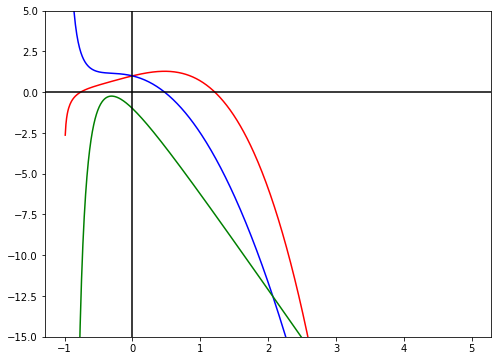

In [8]:
import matplotlib.pyplot as plt

func_arr = []
der_arr = []
der2_arr = []
x_arr = np.arange(-0.99, 5, 0.01)
for x in x_arr:
    func_arr.append(myfunc(x))
    der_arr.append(myfunc_der(x))
    der2_arr.append(myfunc_2der(x))
    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_arr, func_arr, color = 'red')
ax.plot(x_arr, der_arr, color = 'blue')
ax.plot(x_arr, der2_arr, color = 'green')
plt.ylim(-15, 5)  
plt.axhline(0, color='black')
plt.axvline(0, color='black')

Из графика видно, что один корень нашего уравнения находится где-то в районе x = -0.8, а другой - около x = 1.3

Для того чтобы использовать метод Ньютона, нам необходимо подобрать отрезок $[a, b]$, такой, что на нём первая и вторая производные будут иметь постоянный знак и выполняется: $f(a)f(b) < 0$

Этим условиям удовлетворяет отрезок $[1, 2]$

Точку $x^{(0)}$ выберем так, чтобы выполнялось: $f(x^{(0)})f''(x^{(0)}) > 0$. Этому условию вполне удовлетворяет точка $x^{(0)} = 2$

In [9]:
root, it = newton_iteration(myfunc, myfunc_der, 2)
print("Корень x = " + str(root) + " найден за " + str(it) + " итераций")

Корень x = 1.2154119454687549 найден за 5 итераций


## Метод простых итераций
    

Для метода простых итераций перепишем уравнение $\ln(x+1) - x^{3} + 1 = 0$, возведя обе части в степень экспоненты:

$$\frac{(1+x)}e{e^{(x^{3})}} = 1$$

Тогда можно представить его в виде: $x = \phi(x)$, где:
$$\phi(x) = \frac{e^{(x^{3})}}{e} - 1 $$



На отрезке $x \in -[1, 0]$ будет выполняться $\phi(x) \in [-1, 0]$, при этом $\phi'(x) = 3e^{(x^{3}-1)}x^{2}$ и на интервале $(-1, 0)$ будет $|\phi'(x)| < 0.45 = q $

Тогда достижение требуемой точности контролируется условием: 
$$ \frac{9}{11}|x^{(k+1)} - x^{(k)}| \leqslant \varepsilon $$



In [10]:
phi = lambda x: ((np.e)**(x**3))/(np.e)-1

In [11]:
def fixed_point(f, x0, eps = 1e-5, maxiter = 1000): #параметр maxiter нужен только чтобы не было бесконечных циклов 
    x_next = x0
    i = 0
    while i < maxiter: 
        x_n = x_next
        x_next = f(x_n)
        #print("x_n " + str(x_n) + " x_next: " + str(x_next))
        i+=1
        if (9/11)*np.linalg.norm(x_n - x_next) < eps:
            break
    return x_next, i

В качестве начального приближения возьмём точку $ x^{(0)} = \frac{-1 + 0}{2} = -0.5$

In [12]:
root, it = fixed_point(phi, -0.5)
print("Корень x = " + str(root) + " найден за " + str(it) + " итераций")

Корень x = -0.7648059153186371 найден за 12 итераций


Text(0, 0.5, 'отклонение от истинного значения корня')

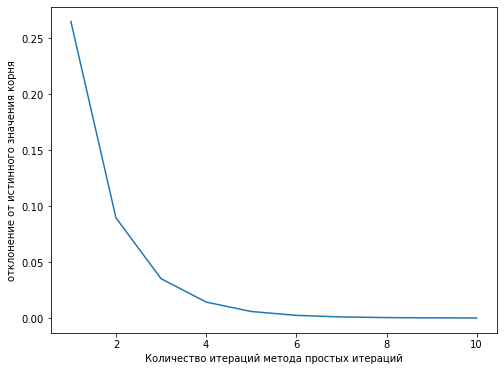

In [135]:
roots = []
true, g = fixed_point(phi, -0.5) 

for it in range(10):
    root, i = fixed_point(phi, -0.5, maxiter = it)
    roots.append(root)

maes = []
for root in roots:
    maes.append(abs(true - root))

    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,11), maes)
ax.set_xlabel('Количество итераций метода простых итераций')
ax.set_ylabel('отклонение от истинного значения корня')

Text(0, 0.5, 'отклонение от истинного значения корня')

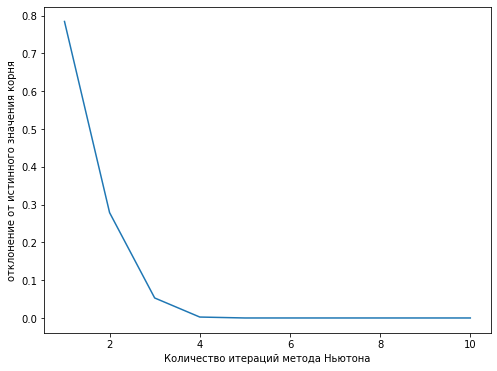

In [138]:
roots = []
true, g = newton_iteration(myfunc, myfunc_der, 2) 

for it in range(10):
    root, i = newton_iteration(myfunc, myfunc_der, 2, maxiter = it)
    roots.append(root)

maes = []
for root in roots:
    maes.append(abs(true - root))

    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,11), maes)
ax.set_xlabel('Количество итераций метода Ньютона')
ax.set_ylabel('отклонение от истинного значения корня')